# Sports Comment Analysis

The objective of this project was to analyze comments from news media regarding South Korea's National Footbal friendly match against Uzbekistan

- Using Python 3.6.1
- Using a Korean NLP module (konlpy)
- Analyze similar words
- Create word cloud visual
- Sentiment Analysis
- Topic Modeling

In [1]:
import sys
print (sys.version)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

3.6.1 (default, Sep  7 2017, 16:36:03) 
[GCC 6.3.0 20170406]


## References
https://www.lucypark.kr/courses/2015-ba/text-mining.html

## 1. Text Exploration

### 1.1 Load Data

In [2]:
import glob # module for finding path names.. will use for concatenating csv files
import pandas as pd # loading into dataframe not necessary just for visual

path =r'data' # use your path
allFiles = glob.glob(path + "/*.csv") 
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, encoding="cp949") # need to change the encoding to something suitable
    list_.append(df)
frame = pd.concat(list_)

In [3]:
frame.head() # first few rows... quite funny

,newsTitle,replyCount,contents,userIdNo,idProvider,regTime,modTime,sympathyCount,antipathyCount,userBlind,best
0,[한국 우즈벡] 완쾌 불가? ‘불치병’에 걸린 한국축구,11,지들이 바셀인줄아나 되도 않는 티키타카하고있네,5PsQB,naver,2017-09-06T01:54:49+0900,2017-09-06T01:54:49+0900,61,6,False,True
1,[한국 우즈벡] 완쾌 불가? ‘불치병’에 걸린 한국축구,2,본선진출 당해버렷다....,2F5oj,naver,2017-09-06T01:54:53+0900,2017-09-06T01:54:53+0900,39,7,False,True
2,[한국 우즈벡] 완쾌 불가? ‘불치병’에 걸린 한국축구,1,느그 개발새키들 문전앞에서 공을못처넣네,2PzVp,naver,2017-09-06T01:55:04+0900,2017-09-06T01:55:04+0900,33,2,False,True
3,[한국 우즈벡] 완쾌 불가? ‘불치병’에 걸린 한국축구,0,유럽팀에 티켓 더 줘라 그냥..,IfZx,naver,2017-09-06T01:55:01+0900,2017-09-06T01:55:01+0900,32,3,False,True
4,[한국 우즈벡] 완쾌 불가? ‘불치병’에 걸린 한국축구,0,이란이랑 케이로스 그리 까더만 이란 아니었음 어쩔뻔 ㅋㅋㅋ,3ABhD,naver,2017-09-06T01:54:50+0900,2017-09-06T01:54:50+0900,23,3,False,True


In [4]:
frame.shape #137,400 rows of wordies cool

(137400, 11)

### 1.2 Tokenization

In [5]:
text = frame.contents.to_string()

In [6]:
type(text) # check type of string

str

In [7]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(text) # use twitter tokenizer to tokenize the text... this will take some time 

In [8]:
import nltk
ko = nltk.Text(tokens_ko)   # For Python 2, input `name` as u'유니코드'

In [9]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

2239552
40794


FreqDist({'0': 1578,
          '지': 10566,
          '들이': 672,
          '바': 225,
          '셀': 27,
          '인': 2252,
          '줄': 3012,
          '아': 8132,
          '나': 8449,
          '되': 2249,
          '도': 19631,
          '않는': 767,
          '티키타카': 31,
          '하고': 6644,
          '있네': 492,
          '1': 4329,
          '본선': 5345,
          '진출': 4720,
          '당해버렷': 2,
          '다': 41710,
          '....': 3465,
          '2': 4385,
          '느그': 53,
          '개발': 124,
          '새키': 107,
          '들': 24716,
          '문전': 22,
          '앞': 1105,
          '에서': 7530,
          '공': 406,
          '을': 18194,
          '못처': 2,
          '넣네': 10,
          '3': 3989,
          '유럽': 756,
          '팀': 3115,
          '에': 17736,
          '티켓': 497,
          '더': 4208,
          '줘': 915,
          '라': 19100,
          '그냥': 3512,
          '..': 12401,
          '4': 1001,
          '이란': 6226,
          '이랑': 1399,
          '케이로스': 212,
 

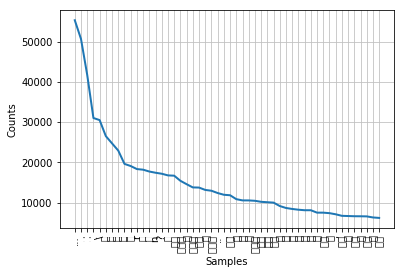

In [10]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens

In [11]:
ko.count('골')   # Counts occurrences

2944

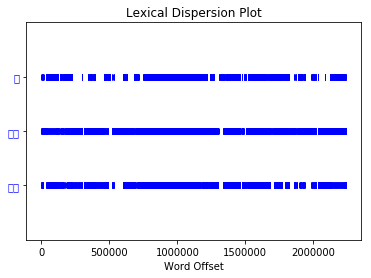

In [12]:
ko.dispersion_plot(['골', '본선', '진출'])

In [13]:
ko.concordance('골') # we can see that there are some 알바 that are just copying and pasting 알바work

Displaying 25 of 2944 matches:
구마 30 개정 도 먹고 사이다 안마 신기 분 ... 38 아오 진짜 골 더렇 게 못 넣네 39 끝나고 쳐 웃네 웃음 이 나오냐 ㅋㅋㅋㅋ 티켓
직임 제 ... 82 마지막 에 세컨볼 놓친 건 진짜 실망 이다 83 골 결정 력 ㅋㅋㅋㅋㅋㅋㅋ 84 개노 답 이다 진짜 ㄹㅇ 염기훈 이동국 
마 30 개정 도 먹고 사이다 안마 신기 분 ... 138 아오 진짜 골 더렇 게 못 넣네 139 끝나고 쳐 웃네 웃음 이 나오냐 ㅋㅋㅋㅋ 티
 제 ... 182 마지막 에 세컨볼 놓친 건 진짜 실망 이다 183 골 결정 력 ㅋㅋㅋㅋㅋㅋㅋ 184 개노 답 이다 진짜 ㄹㅇ 염기훈 이동국
 다 ‥ 딱 일제시대 태어났 으면 매국노 상 이다 71 축구 라는 게 골 을 넣어 야 이기는 경기 아님 ? 슈틸리케 가 감독 하면 서 월드컵 
다 ‥ 딱 일제시대 태어났 으면 매국노 상 이다 171 축구 라는 게 골 을 넣어 야 이기는 경기 아님 ? 슈틸리케 가 감독 하면 서 월드컵 
다 ‥ 딱 일제시대 태어났 으면 매국노 상 이다 271 축구 라는 게 골 을 넣어 야 이기는 경기 아님 ? 슈틸리케 가 감독 하면 서 월드컵 
다 ‥ 딱 일제시대 태어났 으면 매국노 상 이다 371 축구 라는 게 골 을 넣어 야 이기는 경기 아님 ? 슈틸리케 가 감독 하면 서 월드컵 
다 ‥ 딱 일제시대 태어났 으면 매국노 상 이다 471 축구 라는 게 골 을 넣어 야 이기는 경기 아님 ? 슈틸리케 가 감독 하면 서 월드컵 
 69 솔직히 경기 보면 서 한숨 만 수십 번 .. 차라리 우즈벡 이 골 넣어 라 하고 .. 자연스레 응원 하게 됨 ... 70 진짜 개 못 
169 솔직히 경기 보면 서 한숨 만 수십 번 .. 차라리 우즈벡 이 골 넣어 라 하고 .. 자연스레 응원 하게 됨 ... 170 진짜 개 못
269 솔직히 경기 보면 서 한숨 만 수십 번 .. 차라리 우즈벡 이 골 넣어 라 하고 .. 자연스레 응원 하게 됨 ... 270 진짜 개 못
뺄 려고 했 음 

In [14]:
ko.similar('골')
ko.similar('본선')

감독 월드컵 신태용 한국 손흥민 이란 팀 축협 국민 염기훈 대표팀 명 성적 본선 다 가 없 진짜 박지성 우즈벡
월드컵 축협 한국 감독 에 러시아 강 진출 대표팀 신태용 그냥 이란 예선 좋 히딩크 실력 손흥민 강제 아시아 년


In [15]:
ko.collocations()

염기훈 이동국; 염기훈 들어오니; 살아나긴 했지만; 이래도 느그흥; 월드컵 진출한; 그렇게 욕하더; 아시아 농어촌; 신태용
인터뷰; 솔직히 괌한테; 치우는 김민재; 이동국 들어오고; 들어가고 분위기; 장현수 나가고; 드리블 이근호; 토트넘 경기도;
고요한 심하다; 장현수 권창훈; 이승우 백승호; 살아남 이렇게; 대한민국 국가대표


# 2. Topic Modeling

##  2.1 Preprocessing

### 2.1.1 Load Documents

In [16]:
docs_list = frame.contents.values.tolist() # to list

### 2.1.2 Tokenize

In [17]:
from konlpy.tag import Twitter; t = Twitter()
pos = lambda d: ['/'.join(p) for p in t.pos(d, stem=True, norm=True)]
texts_ko = [pos(doc) for doc in docs_list]
print(texts_ko[0])

['지다/Verb', '들이다/Verb', '바/Noun', '세다/Verb', '되다/Verb', '않다/Verb', '티키타카/Noun', '하고/Josa', '있다/Adjective']


### 2.1.3 Encoding to Integers

In [20]:
from gensim import corpora
dictionary_ko = corpora.Dictionary(texts_ko)
dictionary_ko.save('ko.dict')  # save dictionary to file for future use

### 2.1.4 Calculate Term Frequency - Inverse Document Frequency (TF-IDF)

In [21]:
from gensim import models
tf_ko = [dictionary_ko.doc2bow(text) for text in texts_ko]
tfidf_model_ko = models.TfidfModel(tf_ko)
tfidf_ko = tfidf_model_ko[tf_ko]
corpora.MmCorpus.serialize('ko.mm', tfidf_ko) # save corpus to file for future use

# print first 10 elements of first document's tf-idf vector
print(tfidf_ko.corpus[0][:10])
# print top 10 elements of first document's tf-idf vector
print(sorted(tfidf_ko.corpus[0], key=lambda x: x[1], reverse=True)[:10])
# print token of most frequent element
print(dictionary_ko.get(414))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
무도/Noun


## 2.2 Train Topic Models

### 2.2.1 LSI

In [22]:
ntopics, nwords = 3, 5
lsi_ko = models.lsimodel.LsiModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
print(lsi_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.239*"./Punctuation" + 0.229*"하다/Verb" + 0.186*"이/Josa" + 0.156*"월드컵/Noun" + 0.153*"가/Josa"'), (1, '-0.662*"염기훈/Noun" + -0.382*"잘하다/Verb" + -0.228*"제일/Noun" + -0.165*"이동국/Noun" + -0.137*"최고/Noun"'), (2, '-0.506*"실화/Noun" + -0.415*"손흥민/Noun" + -0.411*"냐/Josa" + 0.185*"진출/Noun" + 0.176*"월드컵/Noun"')]


### 2.2.2 LDA

In [24]:
import numpy as np; np.random.seed(42)  # optional
lda_ko = models.ldamodel.LdaModel(tfidf_ko, id2word=dictionary_ko, num_topics=ntopics)
print(lda_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.008*"하다/Verb" + 0.007*"이/Josa" + 0.007*"축구/Noun" + 0.007*"들/Suffix" + 0.007*"./Punctuation"'), (1, '0.013*"감독/Noun" + 0.012*"히딩크/Noun" + 0.010*"./Punctuation" + 0.010*"모시다/Verb" + 0.009*"신태용/Noun"'), (2, '0.013*"졸다/Verb" + 0.010*"ㅋㅋ/KoreanParticle" + 0.008*"경기/Noun" + 0.008*"하다/Verb" + 0.007*"잘하다/Verb"')]


### 2.2.3 HDP

In [25]:
import numpy as np; np.random.seed(42)  # optional
hdp_ko = models.hdpmodel.HdpModel(tfidf_ko, id2word=dictionary_ko)

TypeError: print_topics() got an unexpected keyword argument 'topics'

In [27]:
print(hdp_ko.print_topics(num_topics=ntopics, num_words=nwords))

[(0, '0.002*하다/Verb + 0.002*./Punctuation + 0.001*이/Josa + 0.001*가/Josa + 0.001*?/Punctuation'), (1, '0.002*하다/Verb + 0.002*./Punctuation + 0.001*이/Josa + 0.001*ㅋㅋ/KoreanParticle + 0.001*../Punctuation'), (2, '0.002*하다/Verb + 0.002*./Punctuation + 0.001*이/Josa + 0.001*../Punctuation + 0.001*가/Josa')]


## 2.3 Scoring Documents

In [28]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[0])]
sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True)
sorted(lda_ko[bow], key=lambda x: x[1], reverse=True)
sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True)

[(0, 0.072247641130973178),
 (1, 0.024248657045291229),
 (2, 0.0025933980439903832)]

[(2, 0.62957495297943222), (0, 0.26432781462212518), (1, 0.10609723239844267)]

[(83, 0.73538825235434813)]

In [29]:
bow = tfidf_model_ko[dictionary_ko.doc2bow(texts_ko[1])]
sorted(lsi_ko[bow], key=lambda x: x[1], reverse=True)
sorted(lda_ko[bow], key=lambda x: x[1], reverse=True)
sorted(hdp_ko[bow], key=lambda x: x[1], reverse=True)

[(2, 0.16886665185900274), (1, 0.13248894433151559), (0, 0.12231499165740078)]

[(1, 0.78668057440739125), (2, 0.10921699039146482), (0, 0.10410243520114389)]

[(142, 0.69047717054696389)]

## 3. word2vec visualization

### 3.1 Train

In [30]:
from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko)
wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec.model')

### 3.2 Test

In [31]:
wv_model_ko.most_similar(pos('손흥민'))
wv_model_ko.most_similar(pos('최고'))

[('농민/Noun', 0.5093657970428467),
 ('기성용/Noun', 0.4948856234550476),
 ('정우영/Noun', 0.4667856991291046),
 ('김영권/Noun', 0.4553064703941345),
 ('권창훈/Noun', 0.44821345806121826),
 ('고요한/Noun', 0.4239917993545532),
 ('그립다/Adjective', 0.40672528743743896),
 ('염기훈/Noun', 0.4064869284629822),
 ('김진수/Noun', 0.40308189392089844),
 ('소/Noun', 0.400369793176651)]

[('벽/Noun', 0.4806039035320282),
 ('왼발/Noun', 0.4766640365123749),
 ('구멍/Noun', 0.4723696708679199),
 ('맙소사/Exclamation', 0.4691539406776428),
 ('표본/Noun', 0.4552454650402069),
 ('구단/Noun', 0.4424331784248352),
 ('최악/Noun', 0.4381036162376404),
 ('사나이/Noun', 0.4355880916118622),
 ('가장/Noun', 0.4131602644920349),
 ('불멸/Noun', 0.40425217151641846)]

### 3.3 Visualize

In [32]:
from collections import Counter
import urllib
import random
import webbrowser

from konlpy.tag import Hannanum
from lxml import html
import pytagcloud # requires Korean font support
import sys

In [33]:
if sys.version_info[0] >= 3:
    urlopen = urllib.request.urlopen
else:
    urlopen = urllib.urlopen

In [34]:
def get_bill_text(billnum):
    url = 'http://pokr.kr/bill/%s/text' % billnum
    response = urlopen(url).read().decode('utf-8')
    page = html.fromstring(response)
    text = page.xpath(".//div[@id='bill-sections']/pre/text()")[0]
    return text

In [35]:
# Create random numbers for selecting the number of words and colors
r = lambda: random.randint(0,255)
color = lambda: (r(), r(), r())

In [36]:
def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum()
    nouns = h.nouns(text)
    count = Counter(nouns)
    return [{ 'color': color(), 'tag': n, 'size': c*multiplier }\
                for n, c in count.most_common(ntags)]

In [37]:
def draw_cloud(tags, filename, fontname='Noto Sans CJK', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    webbrowser.open(filename)

In [38]:
bill_num = '1904882'
text = get_bill_text(bill_num)

In [ ]:
tags = get_tags(text)
print(tags)
draw_cloud(tags, 'wordcloud.png')

In [ ]:
type(text)